In [6]:
import pandas as pd
import numpy as np
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

startTime = time.time()


df = pd.read_csv('mnist_train.csv')
df.drop(df.index[10001:60000], inplace=True)
x = df.drop(columns=['label'])
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = GradientBoostingClassifier(random_state=42, max_depth=3, warm_start=True)
model.fit(x_train, y_train)

predictions = model.predict(x_test)
score = accuracy_score(y_test, predictions)

endTime = time.time()

print (score)
print('Execution time in seconds: ' + str(endTime-startTime))

0.9120439780109945
Execution time in seconds: 238.15250205993652


In [12]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
import itertools

In [13]:
answer = [1, 0, 9, 3, 4, 5, 7, 8, 4, 6, 7, 8, 3, 2, 1, 3, 0, 9, 3, 4, 5, 7, 8, 4, 6, 7, 8, 3, 2, 1]

prediction = [7, 0, 9, 8, 4, 5, 7, 8, 4, 6, 7, 8, 8, 3, 1, 3, 0, 0, 3, 4, 5, 1, 8, 4, 6, 7, 8, 3, 5, 1]

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
cm = confusion_matrix(y_true=y_test, y_pred=predictions)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       215
           1       0.96      0.98      0.97       237
           2       0.85      0.90      0.88       176
           3       0.93      0.83      0.88       207
           4       0.92      0.92      0.92       203
           5       0.86      0.88      0.87       152
           6       0.95      0.93      0.94       200
           7       0.93      0.92      0.93       212
           8       0.90      0.87      0.89       207
           9       0.84      0.90      0.87       192

    accuracy                           0.91      2001
   macro avg       0.91      0.91      0.91      2001
weighted avg       0.91      0.91      0.91      2001

Confusion matrix, without normalization
[[206   0   2   0   1   2   0   0   4   0]
 [  0 232   1   1   0   1   0   0   1   1]
 [  3   2 159   1   2   1   4   0   3   1]
 [  0   0   8 171   1   8   1   8   8   2]
 [  0   0   1   0 187   0   0

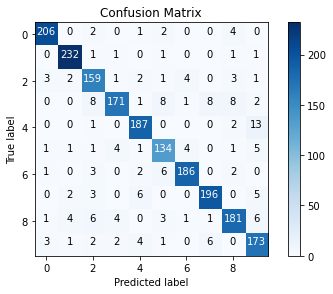

In [16]:
print(classification_report(y_test, predictions))
plot_confusion_matrix(cm=cm, classes=classes, title='Confusion Matrix')